In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./bank.csv"
FEATURES = [
	"age",
	"job",
	"marital",
	"education",
	"default",
	"balance",
	"housing",
	"loan",
	"contact",
	"day",
	"month",
	"duration",
	"campaign",
	"pdays",
	"previous",
	"poutcome"
]
LABEL = "y"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"age": "float32",
	"job": "category",
	"marital": "category",
	"education": "category",
	"default": "category",
	"balance": "float32",
	"housing": "category",
	"loan": "category",
	"contact": "category",
	"day": "float32",
	"month": "category",
	"duration": "float32",
	"campaign": "float32",
	"pdays": "float32",
	"previous": "float32",
	"poutcome": "category",
	"y": "category"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1, delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float32 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  float32 
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  float32 
 10  month      45211 non-null  category
 11  duration   45211 non-null  float32 
 12  campaign   45211 non-null  float32 
 13  pdays      45211 non-null  float32 
 14  previous   45211 non-null  float32 
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), float32(7)
memory usage: 1.6 MB


In [7]:
# Missing values
data = data.dropna()
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,-2.182493e-08,-2.527645e-09,1.194234e-08,-1.079139e-08,-6.888462e-09,1.287180e-08,2.785707e-09
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693507e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693507e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002799e-01,2.326031e-02,-3.035165e-01,-2.465604e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825629e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


In [9]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[4, 9, 2, 1, 11, 5, 0, 7, 6, 10, 3, 8]
[1, 2, 0]
[2, 1, 3, 0]
[0, 1]
[1, 0]
[0, 1]
[2, 0, 1]
[8, 6, 5, 1, 10, 9, 2, 4, 3, 7, 0, 11]
[3, 0, 1, 2]
[0, 1]


In [10]:
data = data.astype(dtype=DTYPE)
data.dtypes

age           float32
job          category
marital      category
education    category
default      category
balance       float32
housing      category
loan         category
contact      category
day           float32
month        category
duration      float32
campaign      float32
pdays         float32
previous      float32
poutcome     category
y            category
dtype: object

In [11]:
# Class Balance
data[LABEL].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [12]:
data.dtypes

age           float32
job          category
marital      category
education    category
default      category
balance       float32
housing      category
loan         category
contact      category
day           float32
month        category
duration      float32
campaign      float32
pdays         float32
previous      float32
poutcome     category
y            category
dtype: object

In [13]:
data[LABEL].nunique()

2

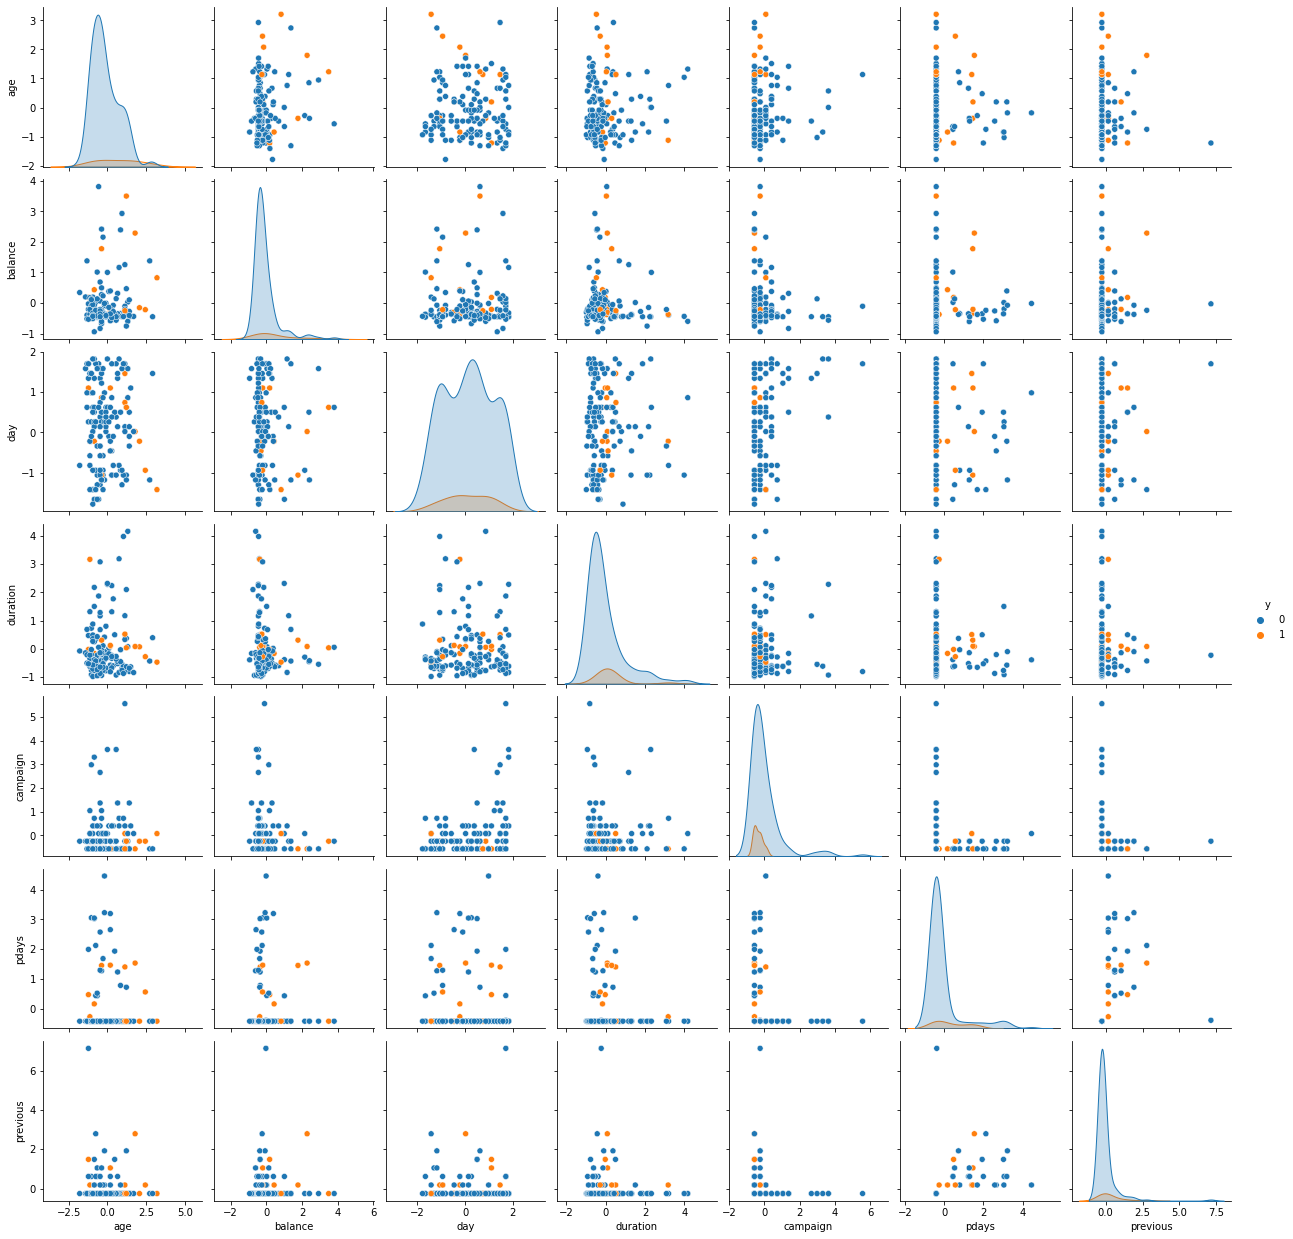

In [14]:
sns.pairplot(data.sample(n=150, random_state=1), hue=LABEL)

In [15]:
target = data.pop(LABEL)
target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: category
Categories (2, int64): [0, 1]

In [16]:
data = pd.get_dummies(data, dtype="float32")
data

,age,balance,day,duration,campaign,pdays,previous,job_4,job_9,job_2,...,month_2,month_4,month_3,month_7,month_0,month_11,poutcome_3,poutcome_0,poutcome_1,poutcome_2
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45208,2.925400,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)